In [1]:
import numpy as np
from pandas.plotting import table
import pandas as pd
import nbimporter
from Kuramoto_dynamicalModels import *
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.tsatools import detrend
import statsmodels
import matplotlib.pyplot as plt
abs_path = '/Users/aarcher/PycharmProjects/Data Driven Dynamical Systems/Kuramoto/pictures/'

Importing Jupyter notebook from Kuramoto_dynamicalModels.ipynb


In [2]:
def granger_casuality_table(df):
    num_cols = len(df.columns)
    colnames = df.columns.values
    
    df_results = pd.DataFrame(index=colnames, columns=colnames)
    df_results = df_results.fillna(0)
    model = VAR(df)
    #fit to VAR model with AIC

    VAR_results = model.fit(ic='aic',trend='nc')

    for row in colnames:
        for col in colnames:
            if not row == col:
                #determine casuality among different angles
                causal_results = VAR_results.test_causality(row, col, kind='Wald')
                causality_conclusion =causal_results.conclusion
                if causality_conclusion == 'reject':
                    df_results.loc[row,col]='GC'
                elif causality_conclusion == 'fail to reject':
                    df_results.loc[row,col]='not GC'
                    
    return df_results

# Strong Coupling

In [3]:
# these are our constants
N = 5  # number of variables
K = 10 #coupling
omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
theta0 = np.array([117.35002435, 261.94283291, 260.06912657, 293.69995793,235.11319532]) # initial state 
tinit = 0.0
tmax = 10.0
dt =  0.01

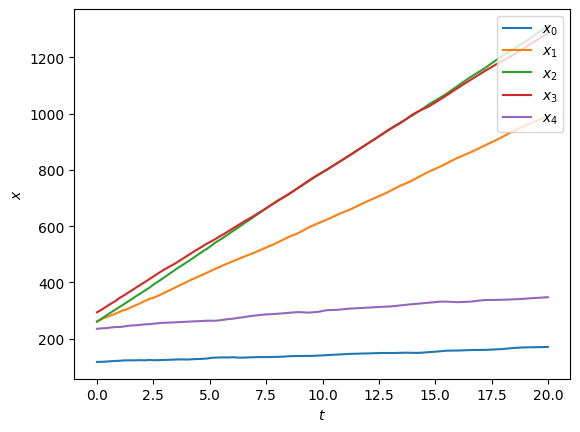

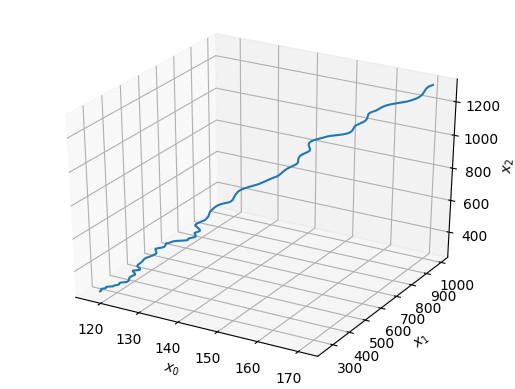

In [4]:
kuramoto = Kuramoto(N,K,omega)
sol = kuramoto.integrate(tinit, 20, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

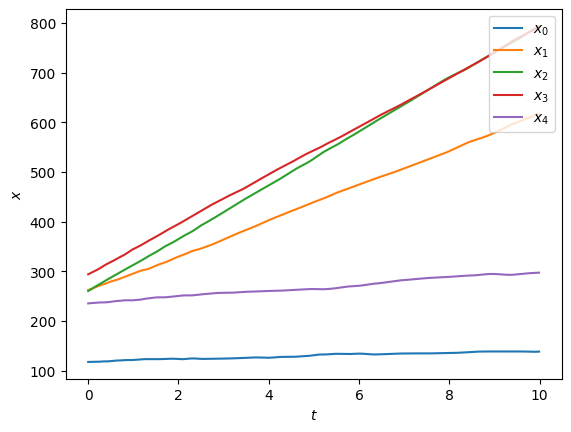

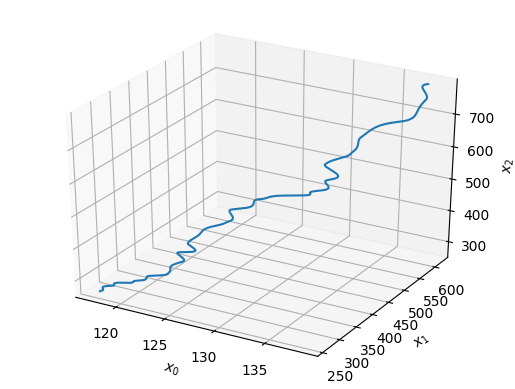

In [5]:
kuramoto = Kuramoto(N,K,omega)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

In [6]:
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
kuramoto_transform_df = kuramoto_df.transform([np.cos,np.sin])
kuramoto_transform_df.columns = [''.join(col).strip() for col in kuramoto_transform_df.columns.values]

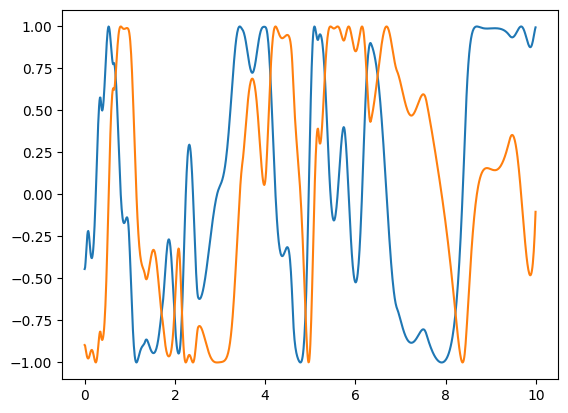

In [7]:
plt.cla()
plt.plot(sol[0],kuramoto_transform_df['x0cos'])
plt.plot(sol[0],kuramoto_transform_df['x0sin'])
plt.show()

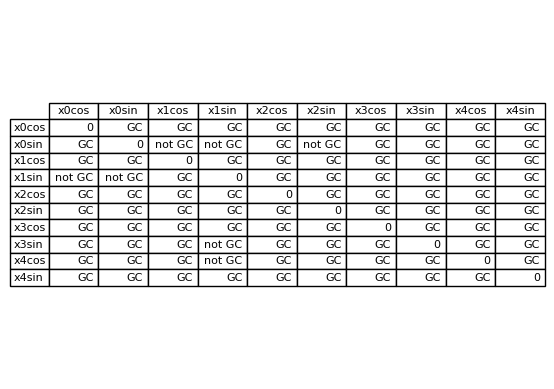

In [8]:
results_df= granger_casuality_table(kuramoto_transform_df)
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, results_df,loc='center')  # where df is your data frame

plt.savefig(abs_path+'strong_deterministickuramoto.png',bbox_inches='tight')
plt.show()

# Weak Coupling

In [9]:
# these are our constants
N = 5  # number of variables
K = 0.01 #coupling
omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
theta0 = np.array([117.35002435, 261.94283291, 260.06912657, 293.69995793,235.11319532]) # initial state 
tinit = 0.0
tmax = 10.0
dt =  0.01

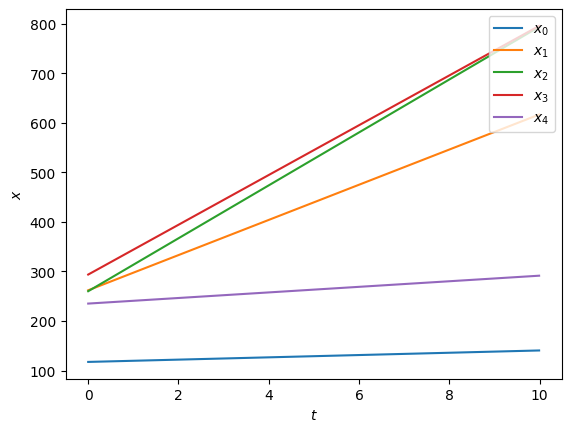

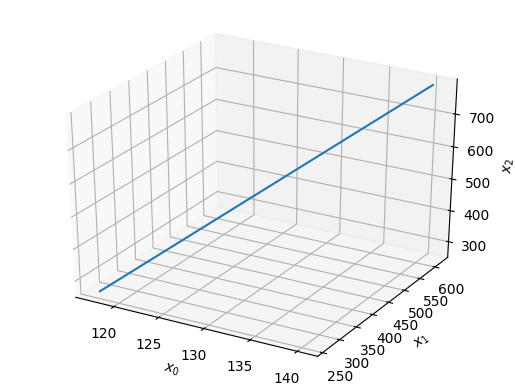

In [10]:
kuramoto = Kuramoto(N,K,omega)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

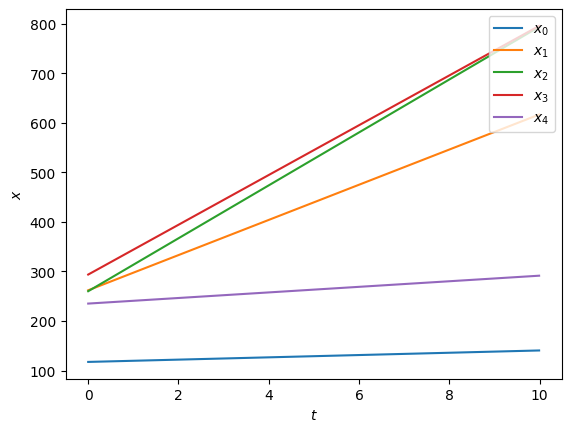

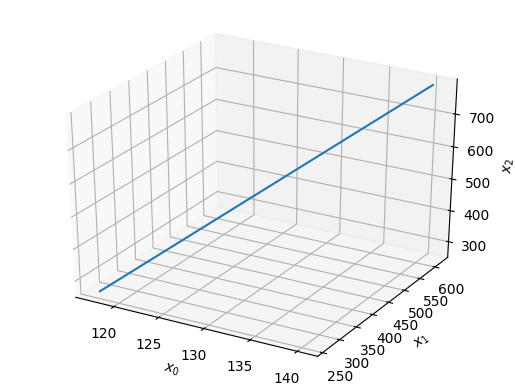

In [11]:
kuramoto = Kuramoto(N,K,omega)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

In [12]:
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
kuramoto_transform_df = kuramoto_df.transform([np.cos,np.sin])
kuramoto_transform_df.columns = [''.join(col).strip() for col in kuramoto_transform_df.columns.values]

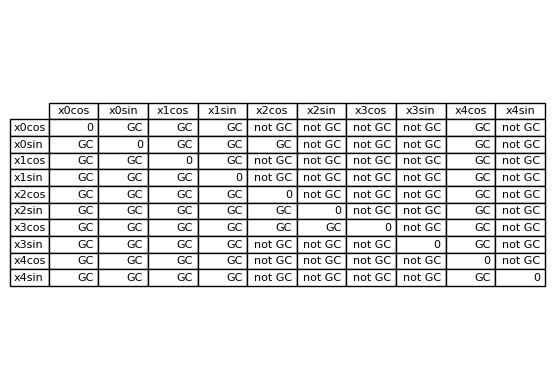

In [13]:
results_df= granger_casuality_table(kuramoto_transform_df)
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, results_df,loc='center')  # where df is your data frame

plt.savefig(abs_path+'weak_deterministickuramoto.png',bbox_inches='tight')
plt.show()

# No Coupling

In [14]:
# these are our constants
N = 5  # number of variables
K = 0 #coupling
omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
theta0 = np.array([117.35002435, 261.94283291, 260.06912657, 293.69995793,235.11319532]) # initial state 
tinit = 0.0
tmax = 10.0
dt =  0.01

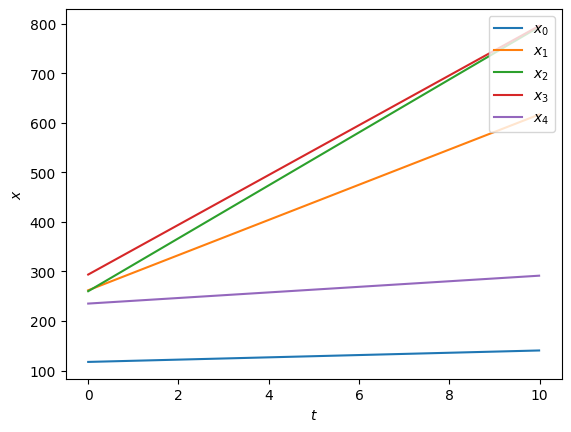

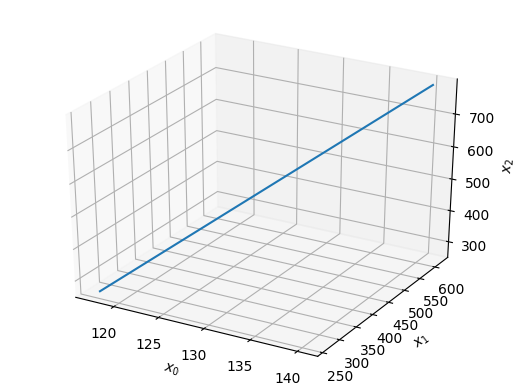

In [15]:
kuramoto = Kuramoto(N,K,omega)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

In [16]:
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
kuramoto_transform_df = kuramoto_df.transform([np.cos,np.sin])
kuramoto_transform_df.columns = [''.join(col).strip() for col in kuramoto_transform_df.columns.values]

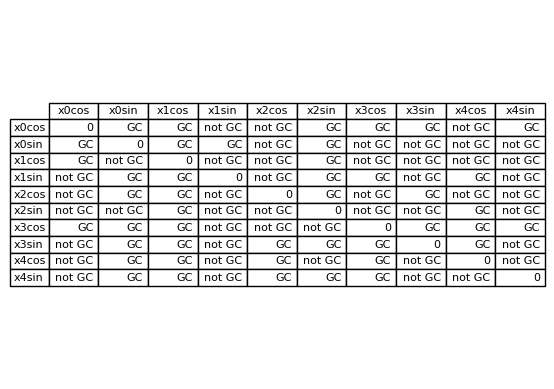

In [17]:
results_df= granger_casuality_table(kuramoto_transform_df)
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, results_df,loc='center')  # where df is your data frame

plt.savefig(abs_path+'no_deterministickuramoto.png',bbox_inches='tight')
plt.show()